In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = np.array([X[i] for i in range(len(X)) if y[i] != 2])
y = np.array([y[i] for i in range(len(y)) if y[i] != 2])
y = y.reshape(-1, 1)
X.shape

(100, 4)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((80, 4), (80, 1)), ((20, 4), (20, 1)))

In [13]:
class LogisticRegression:
    
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))

    def calculate_loss(self,y,y_hat):
        return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()
    
    def calculate_gradient(self,X,y,y_hat):
        return np.dot(X.T,y_hat-y) / y.size
    
    def predict(self,X,theta):
        y_hat = self.sigmoid(np.dot(X,theta))
        return y_hat
    
    def fit(self,X_train,y_train,val,epochs=100,lr=0.01,test_size=0.2,verbose=50):

        losses = []
        train_accs = []
        val_accs = []
        weights = np.random.rand(X.shape[1] + 1, 1)
        
        X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
        n_samples = X_train.shape[0]
        id_permutations = np.random.permutation(n_samples)
        
        X_train = X_train[id_permutations]
        y_train = y_train[id_permutations]
        
        X_val, y_val = val

        X_val = np.concatenate((np.ones((X_val.shape[0],1)),X_val),axis=1)

        for epoch in range(epochs):
            y_hat = self.predict(X_train,weights)
            loss = self.calculate_loss(y_train,y_hat)
            losses.append(loss)
            
            gradient = self.calculate_gradient(X_train,y_train,y_hat)
            weights -= lr * gradient
            
            y_train_pred = self.predict(X_train,weights).round()
            train_acc = (y_train_pred == y_train).mean()
            train_accs.append(train_acc)
            
            y_val_pred = self.predict(X_val,weights).round()
            val_acc = (y_val_pred == y_val).mean()
            val_accs.append(val_acc)

            if epoch % verbose == 0 or epoch == epochs-1:
                print(f'Epoch {epoch} ----- loss: {round(loss,4)}, acc: {round(val_acc,4)}')
        
        self.weights = weights
        self.losses = losses
        self.train_accs = train_accs
        self.val_accs = val_accs

Epoch 0 ----- loss: 2.3476, acc: 0.5
Epoch 50 ----- loss: 1.868, acc: 0.5
Epoch 100 ----- loss: 1.4142, acc: 0.5
Epoch 150 ----- loss: 1.0169, acc: 0.5
Epoch 200 ----- loss: 0.7154, acc: 0.5
Epoch 250 ----- loss: 0.5268, acc: 0.5
Epoch 300 ----- loss: 0.4274, acc: 0.85
Epoch 350 ----- loss: 0.3795, acc: 1.0
Epoch 400 ----- loss: 0.3558, acc: 1.0
Epoch 450 ----- loss: 0.3423, acc: 1.0
Epoch 500 ----- loss: 0.3331, acc: 1.0
Epoch 550 ----- loss: 0.3256, acc: 1.0
Epoch 600 ----- loss: 0.3189, acc: 1.0
Epoch 650 ----- loss: 0.3126, acc: 1.0
Epoch 700 ----- loss: 0.3066, acc: 1.0
Epoch 750 ----- loss: 0.3008, acc: 1.0
Epoch 800 ----- loss: 0.2953, acc: 1.0
Epoch 850 ----- loss: 0.2899, acc: 1.0
Epoch 900 ----- loss: 0.2848, acc: 1.0
Epoch 950 ----- loss: 0.2797, acc: 1.0
Epoch 999 ----- loss: 0.275, acc: 1.0


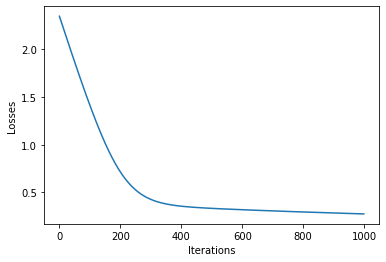

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train,val=(X_test,y_test),lr=0.001,epochs=1000)

plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.plot(model.losses)

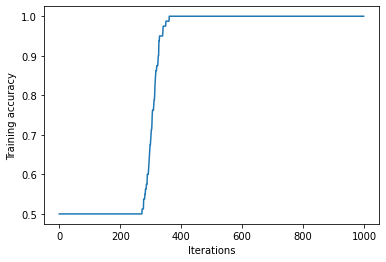

In [15]:
plt.xlabel('Iterations')
plt.ylabel('Training accuracy')
plt.plot(model.train_accs)

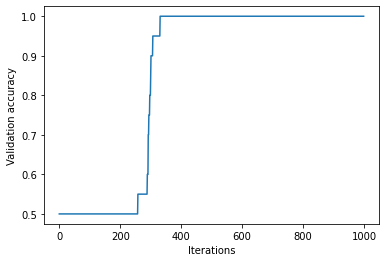

In [16]:
plt.xlabel('Iterations')
plt.ylabel('Validation accuracy')
plt.plot(model.val_accs)